In [7]:
import pandas as pd
import numpy as np
from magi_module_Copy import get_report
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pykrx import stock
%matplotlib inline

In [2]:
price_deviation = pd.read_csv('./price_deviation.csv', encoding = 'euc_kr')
price_deviation['tdate'] = pd.to_datetime(price_deviation['tdate'])
price_deviation = price_deviation.set_index('tdate').drop('Unnamed: 0', axis=1)

In [3]:
price_deviation.head(10)

,A091220,A091230,A098560,A102110,A105010,A114820,A117690,A123310,A123320,A130680,...,A371450,A371460,A371470,A376410,A377990,A381170,A381180,A387270,A387270.1,A387280
tdate,,,,,,,,,,,,,,,,,,,,,
2006-06-27,0.26,-0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-28,0.07,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-29,0.01,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-30,0.26,0.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-03,0.06,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-04,0.24,-0.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-05,0.18,-0.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-06,0.29,0.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-07,0.30,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


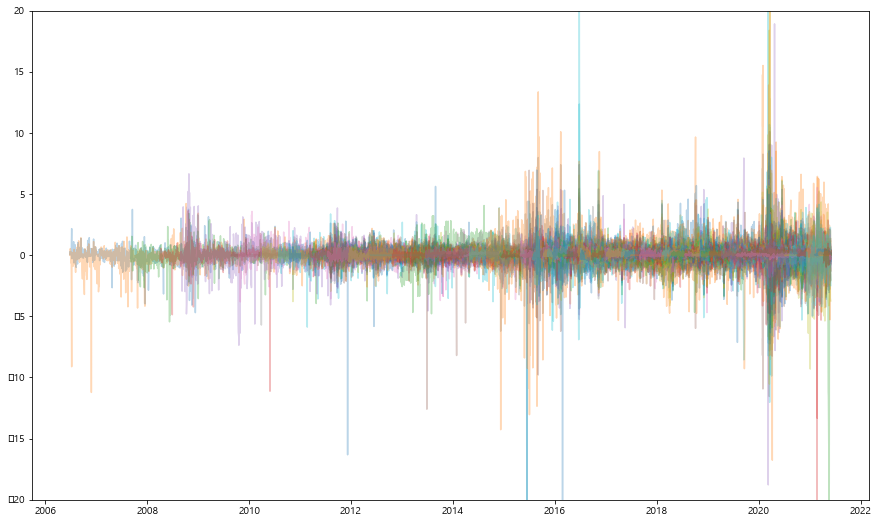

In [14]:
plt.figure(figsize=(15,9))
plt.plot(price_deviation, alpha=0.3)
plt.ylim(-20, 20)
plt.show()

#### 이걸 주식시장의 변동성 군집현상처럼 clustering하는 현상이라고 볼 수 있나..? 지표있나 찾아봐야겠네

In [4]:
price_deviation.index

DatetimeIndex(['2006-06-27', '2006-06-28', '2006-06-29', '2006-06-30',
               '2006-07-03', '2006-07-04', '2006-07-05', '2006-07-06',
               '2006-07-07', '2006-07-10',
               ...
               '2021-05-17', '2021-05-18', '2021-05-20', '2021-05-21',
               '2021-05-24', '2021-05-25', '2021-05-26', '2021-05-27',
               '2021-05-28', '2021-05-31'],
              dtype='datetime64[ns]', name='tdate', length=3689, freq=None)

## 괴리율 전략 함수로 정의

In [5]:
def first(start, end, resampling):
    price_deviation_daily_score = price_deviation.resample(resampling).first().loc[start : end]
    daily_summary, daily_ress = get_report(price_deviation_daily_score)
    return daily_ress.plot(figsize = (10, 5)), daily_summary

In [7]:
target_start_date = '2018-12-31'
target_end_date = '2021-05-31' #29개월=2년 5개월

(<matplotlib.axes._subplots.AxesSubplot at 0x1ec1d76a548>,
               QUAN_5      QUAN_4      QUAN_3      QUAN_2      QUAN_1  \
 RETURN      0.495153    0.780330    1.089306    2.401158    5.739789   
 MDD        -0.549509   -0.379263   -0.358452   -0.251164   -0.228985   
 TURNOVER  395.709464  439.770567  461.138318  462.680344  406.645266   
 CAGR       -0.208872   -0.079354    0.028924    0.339081    0.790463   
 SHARPE     -0.378681   -0.146944    0.067073    0.520532    0.897499   
 
                  L-S    RANK_L-S  
 RETURN     11.386802    7.777572  
 MDD        -0.056929   -0.044282  
 TURNOVER  802.354729  458.567576  
 CAGR        1.249748    0.981290  
 SHARPE      1.611094    1.735601  )

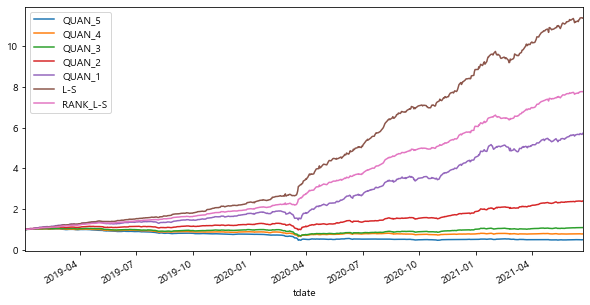

In [8]:
first(target_start_date, target_end_date, 'D')

(<matplotlib.axes._subplots.AxesSubplot at 0x1ec1da1b688>,
               QUAN_5      QUAN_4      QUAN_3      QUAN_2      QUAN_1  \
 RETURN      0.373137    0.648320    0.886693    1.574136    3.711956   
 MDD        -0.627043   -0.353677   -0.247307   -0.077352   -0.105231   
 TURNOVER  384.703496  456.471769  464.051645  472.991255  430.541294   
 CAGR       -0.280071   -0.134508   -0.039293    0.163271    0.548344   
 SHARPE     -0.687994   -0.278294   -0.074965    0.314405    0.781109   
 
                  L-S    RANK_L-S  
 RETURN      9.850356    6.484488  
 MDD        -0.023618   -0.015151  
 TURNOVER  815.244790  463.045433  
 CAGR        1.143634    0.864770  
 SHARPE      1.463148    1.562198  )

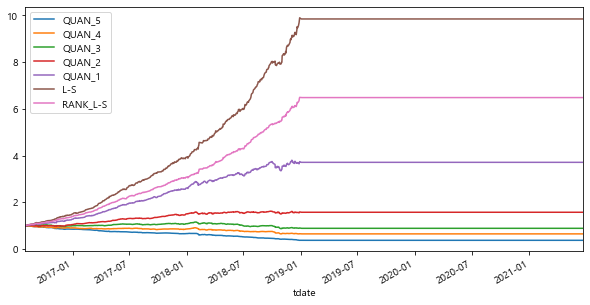

In [10]:
first('2016-07-31', '2018-12-31', 'D')

(<matplotlib.axes._subplots.AxesSubplot at 0x1ec1da13d08>,
               QUAN_5      QUAN_4      QUAN_3      QUAN_2      QUAN_1  \
 RETURN      0.213945    0.612147    1.019032    1.582926    6.196811   
 MDD        -0.790702   -0.397144   -0.142258   -0.075778   -0.106886   
 TURNOVER  402.687321  458.411891  468.869980  472.088764  431.583383   
 CAGR       -0.401909   -0.150913    0.006304    0.165432    0.836775   
 SHARPE     -0.606445   -0.234239    0.016250    0.224556    0.696748   
 
                  L-S    RANK_L-S  
 RETURN     28.135302   14.258964  
 MDD        -0.057231   -0.035382  
 TURNOVER  834.270704  483.875763  
 CAGR        2.041472    1.424912  
 SHARPE      1.148069    1.179315  )

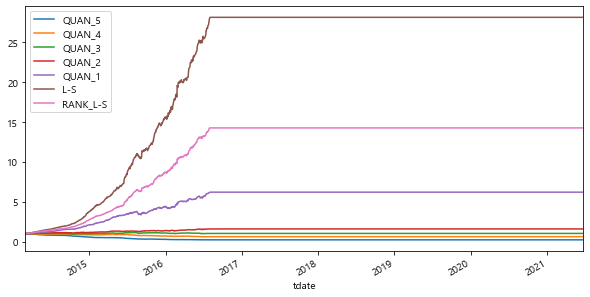

In [11]:
first('2014-02-28', '2016-07-31', 'D')

(<matplotlib.axes._subplots.AxesSubplot at 0x1ec1dac3208>,
                QUAN_5       QUAN_4       QUAN_3       QUAN_2       QUAN_1  \
 RETURN       0.039528     0.309688     0.984263     5.983062   132.028274   
 MDD         -0.962787    -0.744544    -0.482086    -0.251164    -0.228985   
 TURNOVER  1183.100280  1354.654226  1394.059943  1407.760364  1268.769943   
 CAGR        -0.659354    -0.323437    -0.005273     0.815409     4.092007   
 SHARPE      -0.743942    -0.295832     0.009138     0.452734     1.051666   
 
                   L-S     RANK_L-S  
 RETURN    3155.769580   719.130501  
 MDD         -0.057231    -0.044282  
 TURNOVER  2451.870223  1405.488772  
 CAGR        13.667916     7.959200  
 SHARPE       1.986382     2.102502  )

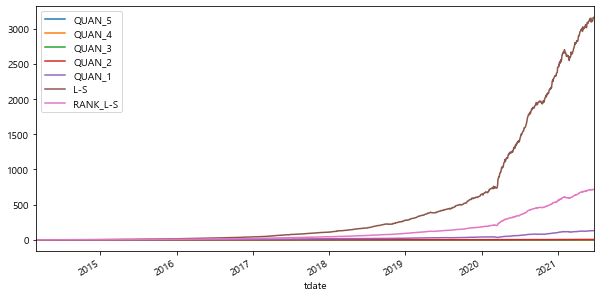

In [13]:
first('2014-02-28', '2021-05-31', 'D')

(<matplotlib.axes._subplots.AxesSubplot at 0x1ec1d8fb688>,
               QUAN_5      QUAN_4      QUAN_3      QUAN_2      QUAN_1  \
 RETURN      1.807708    1.098453    1.336781    0.769929    2.563801   
 MDD        -0.406936   -0.601254   -0.503145   -0.629273   -0.442905   
 TURNOVER  337.500000  249.500000  270.500000  240.500000  334.500000   
 CAGR        0.218174    0.031796    0.101590   -0.083462    0.368658   
 SHARPE      0.105139    0.035729    0.058709    0.000853    0.117662   
 
                  L-S    RANK_L-S  
 RETURN      1.452836    1.103691  
 MDD        -0.291111   -0.216474  
 TURNOVER  672.000000  413.958333  
 CAGR        0.132589    0.033433  
 SHARPE      0.070233    0.032024  )

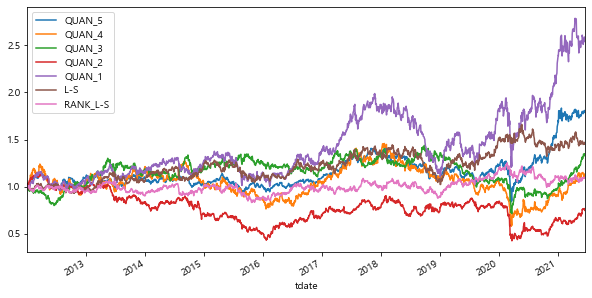

In [20]:
first('2007-09-30', '2009-06-30', 'D')